In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import time

In [2]:
x = np.loadtxt('./data/linearX.csv').reshape(-1,1)
y = np.loadtxt('./data/linearY.csv').reshape(-1,1)

x = (x - np.mean(x))/np.std(x)                  # Normalize
x = np.concatenate((np.ones(x.shape),x),axis=1)

In [3]:
def gradient_descent(x,y,eta,maxit,mincost,verbose=False,theta_init=None):
    """
        Gradient Descent Implementation  
        Args:  
            x,y     :   Training Data  
            eta     :   Learning Rate  
            maxit   :   Maximum number of Iterations  
            mincost :   Minimum cost value  
            verbose :   Prints output regularly  
            theta_init (Optional): Initial parameter values  
        Returns:  
            theta_list  :   Parameter values after each update
            cost_lsit   :   Cost value after each update
    """
    theta = np.zeros((x.shape[1],1)) if theta_init == None else theta_init
    theta_list = [theta]
    diff = y - np.dot(x,theta)
    cost = 0.5*np.sum(diff**2)
    cost_list = [cost]
    iterations = 0

    while(cost > mincost and iterations < maxit):     # Stopping Criteria
        theta = theta + eta*np.dot(x.T,diff)
        theta_list.append(theta)
        diff = y - np.dot(x,theta)
        cost = 0.5*np.sum(diff**2)
        cost_list.append(cost)
        iterations += 1
        if (iterations % 10 == 0 and verbose): print(iterations," - ",cost)

    print("Final Cost - ",cost)
    print("Final Parameters - {0},{1}".format(theta[0],theta[1]))

    return theta_list, cost_list

theta_list, cost_list = gradient_descent(x,y,0.0015,101,0.0001,True)

10  -  1.9250213190537067
20  -  0.07472777168603151
30  -  0.003011261421357803
40  -  0.0002315631124812584
50  -  0.0001238233094727825
60  -  0.00011964736522903555
70  -  0.00011948550758831292
80  -  0.00011947923406205534
90  -  0.00011947899090311974
100  -  0.00011947898147839343
Final Cost -  0.00011947898137293689
Final Parameters - [0.99662003],[0.0013402]


<IPython.core.display.Javascript object>


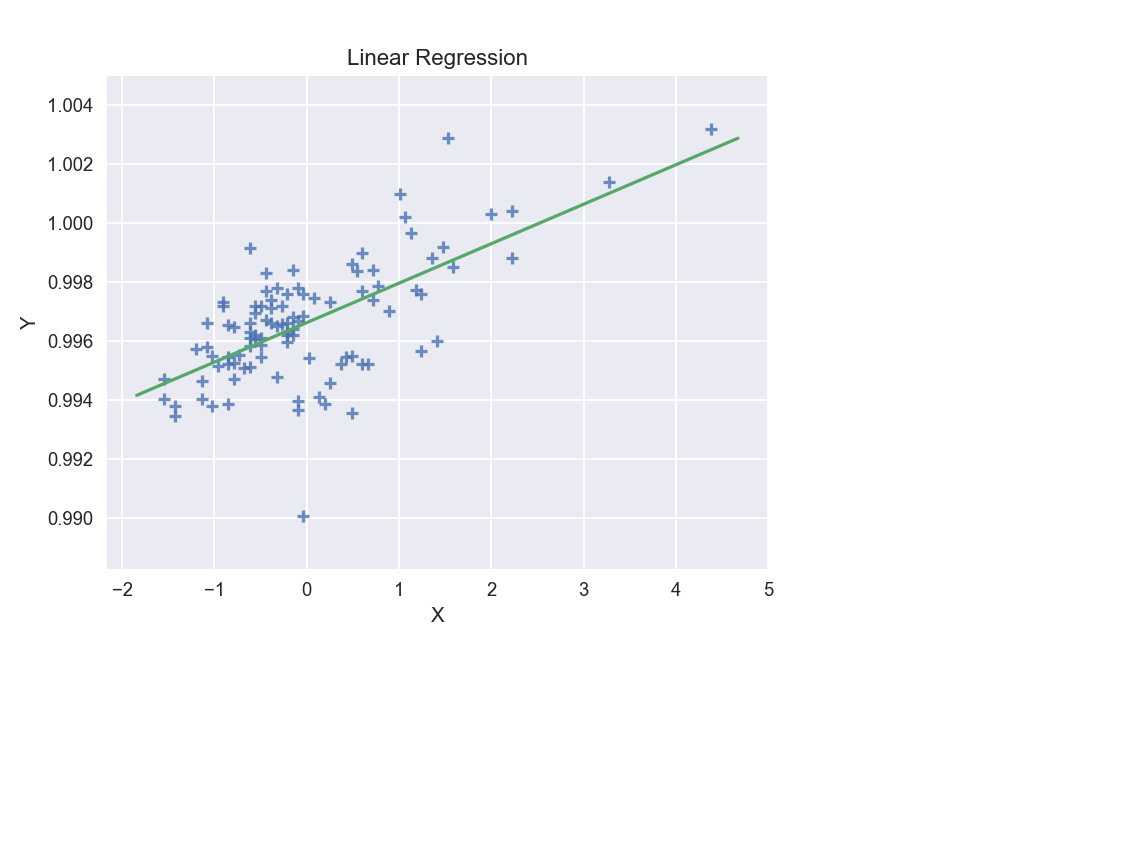

In [4]:
%matplotlib notebook

sns.set()
sns.regplot(x[:,1],y.ravel(),fit_reg=False,marker='+')
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = theta_list[-1][0] + theta_list[-1][1] * x_vals
plt.plot(x_vals,y_vals)
plt.title("Linear Regression")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

<IPython.core.display.Javascript object>


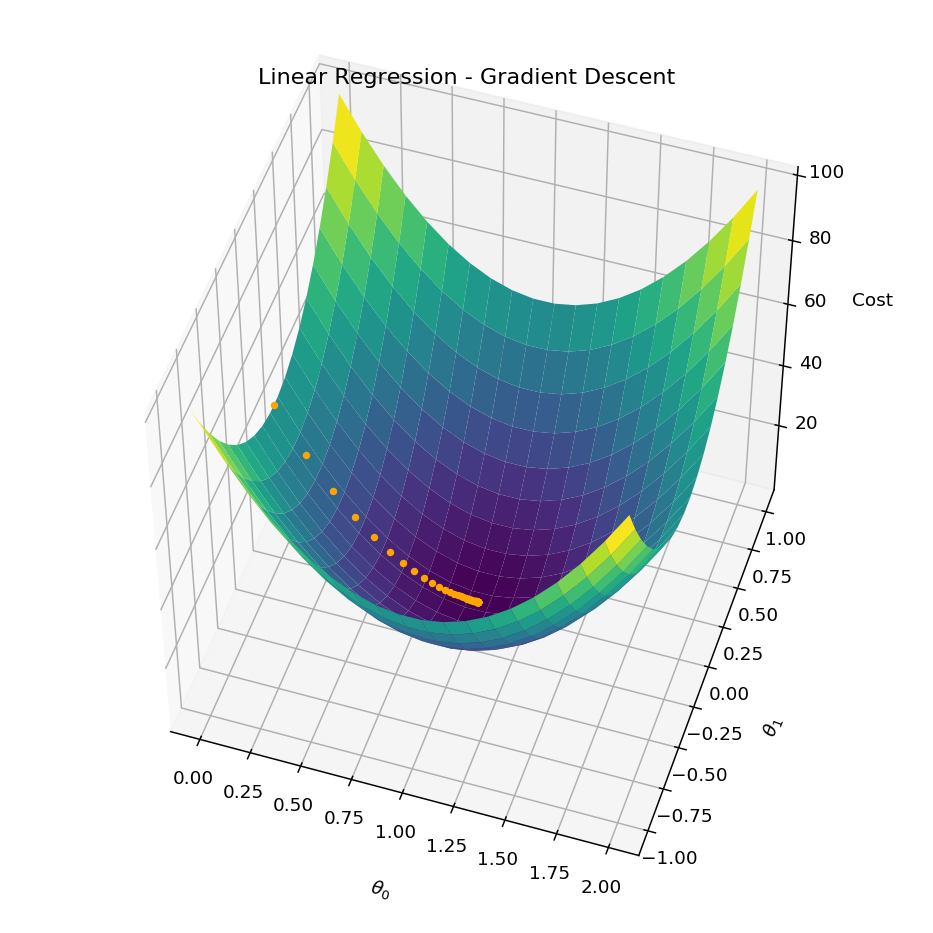

Iteration - 0, Cost - 49.66279047145
Iteration - 10, Cost - 1.9250213190537067
Iteration - 20, Cost - 0.07472777168603151
Iteration - 30, Cost - 0.003011261421357803
Iteration - 40, Cost - 0.0002315631124812584
Iteration - 50, Cost - 0.0001238233094727825
Iteration - 60, Cost - 0.00011964736522903555
Iteration - 70, Cost - 0.00011948550758831292
Iteration - 80, Cost - 0.00011947923406205534
Iteration - 90, Cost - 0.00011947899090311974
Iteration - 100, Cost - 0.00011947898147839343


In [5]:
%matplotlib notebook

sns.reset_orig()
xs = np.linspace(0,2,20)
ys = np.linspace(-1,1,20)
xs, ys = np.meshgrid(xs,ys)
y_repeat = np.repeat(y,xs.shape[0]*xs.shape[1])
diffs = y_repeat.reshape(y.shape[0],xs.shape[0],xs.shape[1]) - np.einsum('ij,jkl->ikl',x,np.array([xs,ys]))
zs = 0.5*np.sum(diffs**2,axis=0)
fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection='3d')
ax.view_init(elev=50,azim=-72)
ax.plot_surface(xs,ys,zs,antialiased=True,cmap=cm.viridis)
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel("Cost")
ax.xaxis.labelpad = ax.yaxis.labelpad = ax.zaxis.labelpad = 15
ax.set_title("Linear Regression - Gradient Descent")
x_vals = np.array([a[0] for a in theta_list])
y_vals = np.array([a[1] for a in theta_list])
z_vals = np.array(cost_list)
for idx in range(z_vals.shape[0]):
    if(idx % 10 == 0): print("Iteration - {0}, Cost - {1}".format(idx,z_vals[idx]))
    ax.plot(x_vals[idx],y_vals[idx],z_vals[idx],color='orange',marker='.')
    fig.tight_layout()
    fig.canvas.draw()
    time.sleep(0.1)

<IPython.core.display.Javascript object>


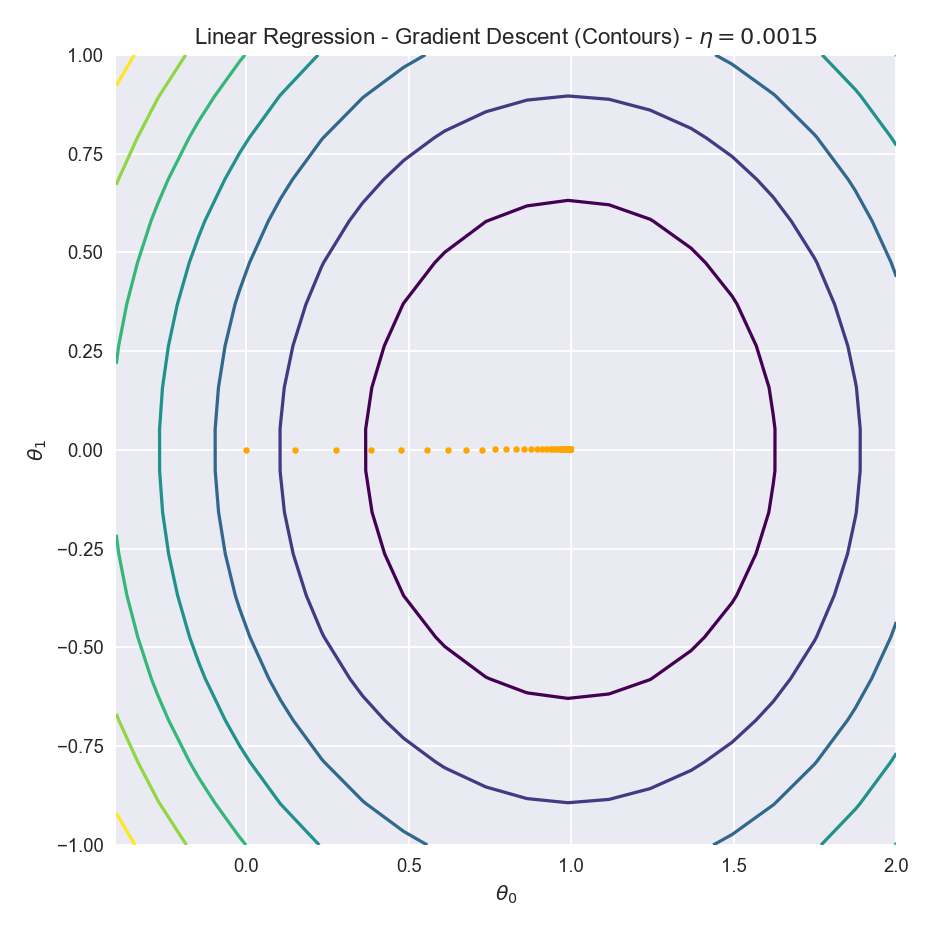

In [6]:
%matplotlib notebook

def contour_plot(xlim,ylim,eta,theta_list,cost_list,verbose=False):
    """
        Plot Contours and visualize Gradient Descent  
        Args:  
            xlim,ylim   :   Plot limits for parameters (displayed along axis)  
            eta         :   Learning Rate  
            theta_list  :   Parameter values after each update  
            cost_list   :   Cost value after each update  
            verbose     :   Prints output regularly  
        Returns:  
            None  
    """
    sns.set()
    x_vals = np.array([a[0] for a in theta_list])
    y_vals = np.array([a[1] for a in theta_list])
    z_vals = np.array(cost_list)
    xlim = xlim if x_vals.min() > xlim[0] and x_vals.max() < xlim[1] else (x_vals.min(),x_vals.max())
    ylim = ylim if y_vals.min() > ylim[0] and y_vals.max() < ylim[1] else (y_vals.min(),y_vals.max())
    xs = np.linspace(xlim[0],xlim[1],20)
    ys = np.linspace(ylim[0],ylim[1],20)
    xs, ys = np.meshgrid(xs,ys)
    y_repeat = np.repeat(y,xs.shape[0]*xs.shape[1])
    diffs = y_repeat.reshape(y.shape[0],xs.shape[0],xs.shape[1]) - np.einsum('ij,jkl->ikl',x,np.array([xs,ys]))
    zs = 0.5*np.sum(diffs**2,axis=0)
    fig = plt.figure(figsize=(7,7))
    ax = fig.gca()
    plt.contour(xs,ys,zs,cmap=cm.viridis)
    ax.set_xlabel(r'$\theta_0$')
    ax.set_ylabel(r'$\theta_1$')
    plt.title("Linear Regression - Gradient Descent (Contours) - " + r'$\eta = {0}$'.format(eta))
    for idx in range(x_vals.shape[0]):
        if(idx % 10 == 0 and verbose): print("Iteration - {0}, Cost - {1}".format(idx,z_vals[idx]))
        ax.plot(x_vals[idx],y_vals[idx],color='orange',marker='.')
        fig.tight_layout()
        fig.canvas.draw()
        time.sleep(0.1)

contour_plot((-0.4,2),(-1,1),0.0015,theta_list,cost_list)

Final Cost -  0.0001195073613982476
Final Parameters - [0.99659628],[0.00134016]


<IPython.core.display.Javascript object>


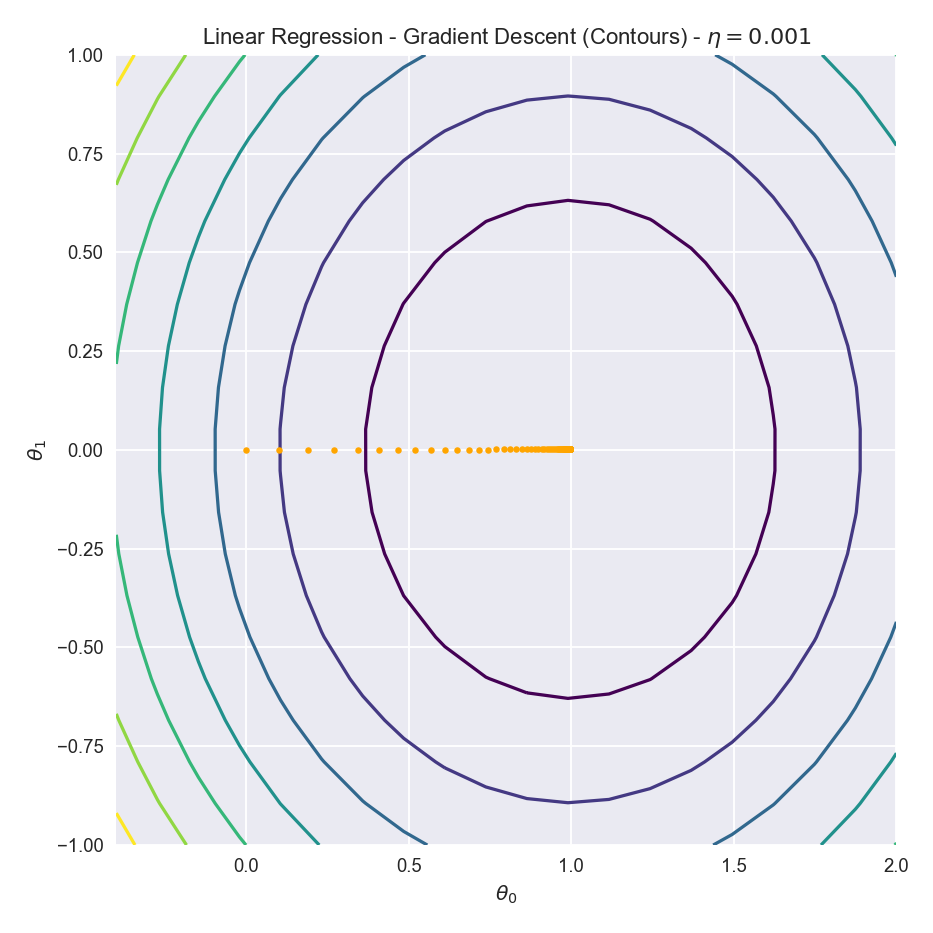

In [7]:
%matplotlib notebook

eta = 0.001
theta_list, cost_list = gradient_descent(x,y,eta,101,0.0001)
contour_plot((-0.4,2),(-1,1),eta,theta_list,cost_list)

Final Cost -  0.00011947898109836604
Final Parameters - [0.9966201],[0.0013402]


<IPython.core.display.Javascript object>


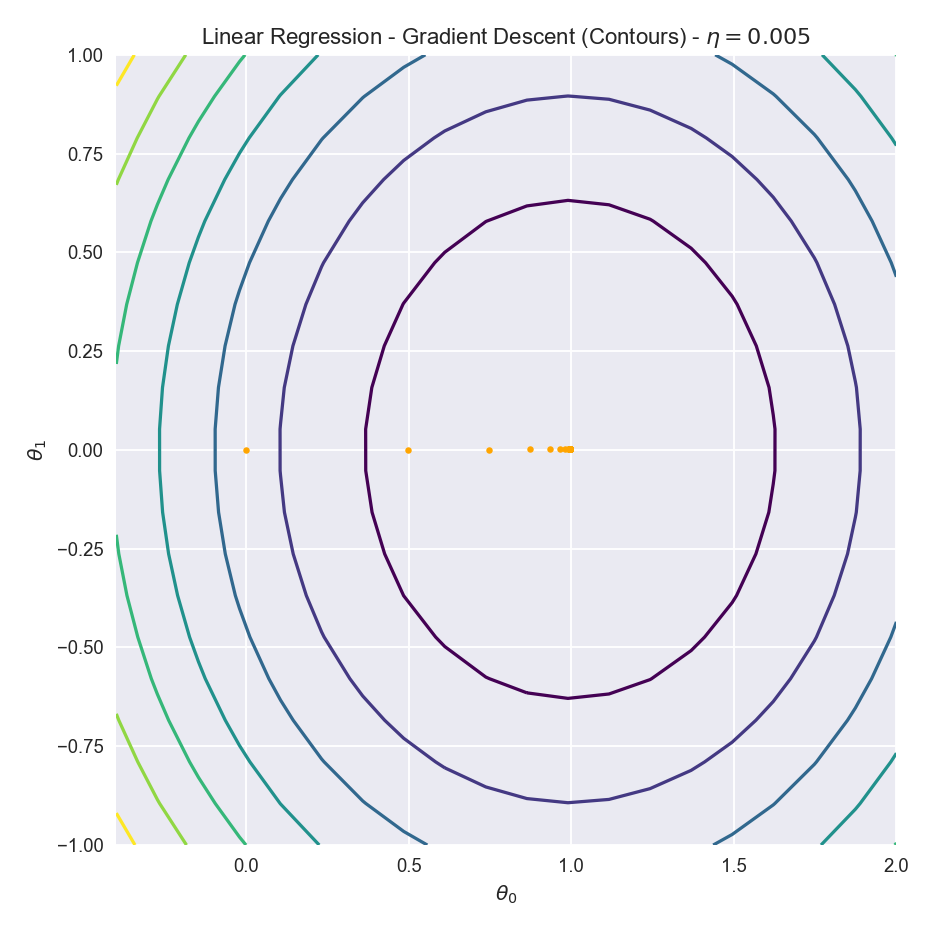

In [8]:
%matplotlib notebook

eta = 0.005
theta_list, cost_list = gradient_descent(x,y,eta,101,0.0001)
contour_plot((-0.4,2),(-1,1),eta,theta_list,cost_list)

Final Cost -  0.00011947898109836601
Final Parameters - [0.9966201],[0.0013402]


<IPython.core.display.Javascript object>


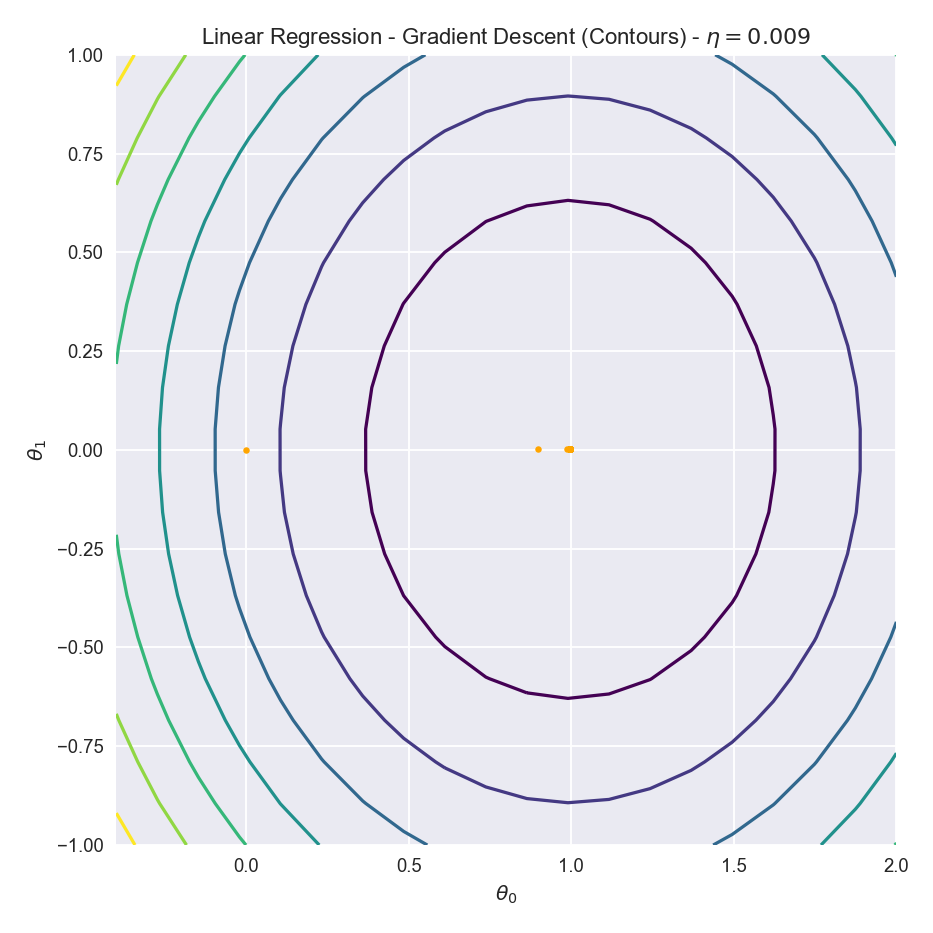

In [9]:
%matplotlib notebook

eta = 0.009
theta_list, cost_list = gradient_descent(x,y,eta,101,0.0001)
contour_plot((-0.4,2),(-1,1),eta,theta_list,cost_list)

Final Cost -  0.00011947898109836601
Final Parameters - [0.9966201],[0.0013402]


<IPython.core.display.Javascript object>


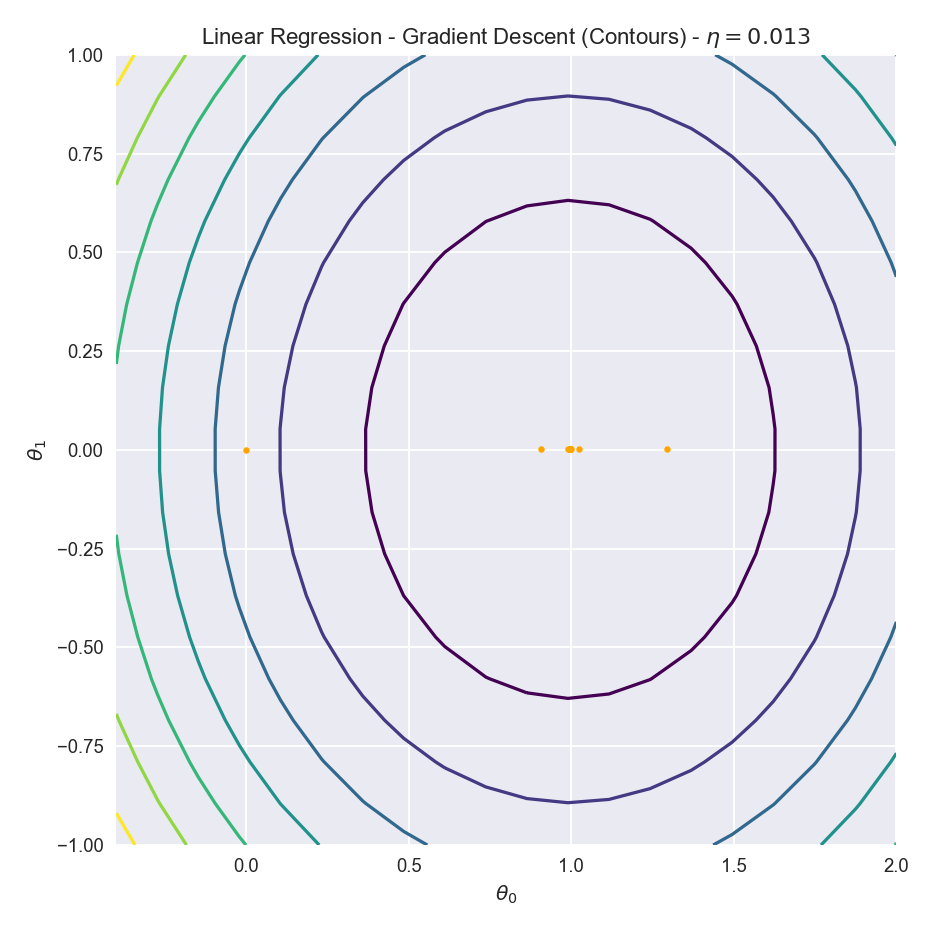

In [10]:
%matplotlib notebook

eta = 0.013
theta_list, cost_list = gradient_descent(x,y,eta,101,0.0001)
contour_plot((-0.4,2),(-1,1),eta,theta_list,cost_list)

Final Cost -  0.00011947898109836701
Final Parameters - [0.9966201],[0.0013402]


<IPython.core.display.Javascript object>


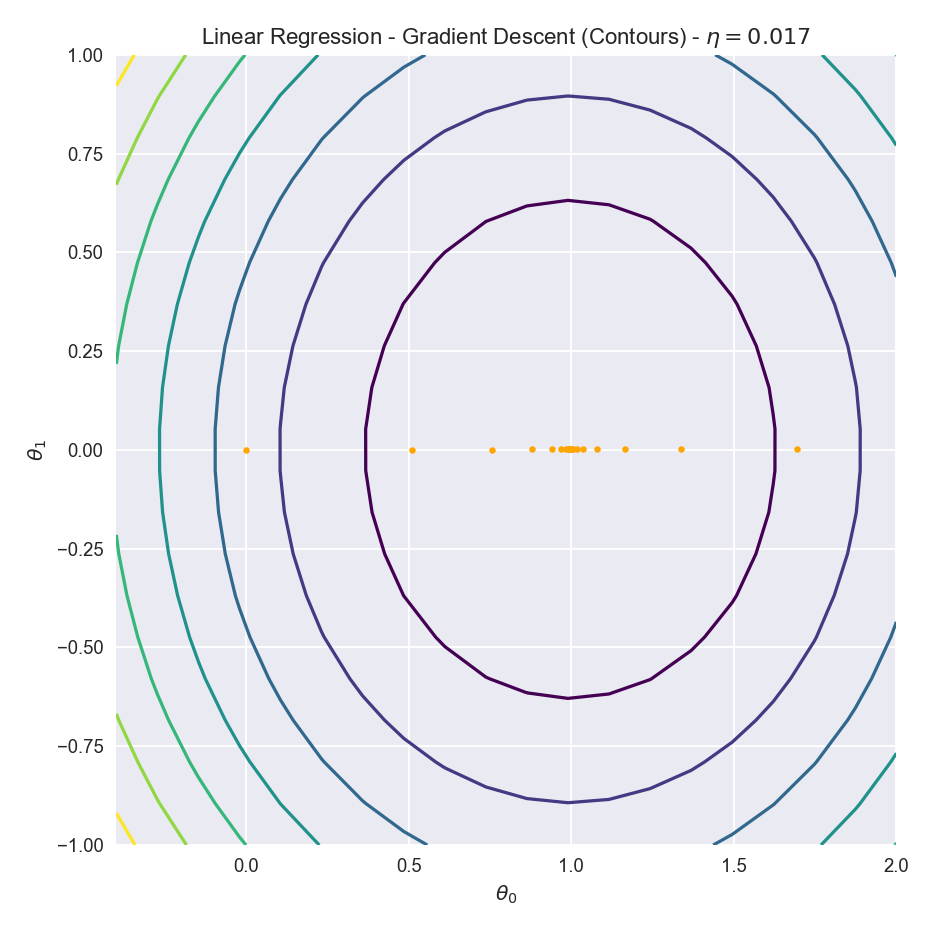

In [11]:
%matplotlib notebook

eta = 0.017
theta_list, cost_list = gradient_descent(x,y,eta,101,0.0001)
contour_plot((-0.4,2),(-1,1),eta,theta_list,cost_list)

Final Cost -  11411755950.153996
Final Parameters - [15108.43539309],[20.31693417]


<IPython.core.display.Javascript object>


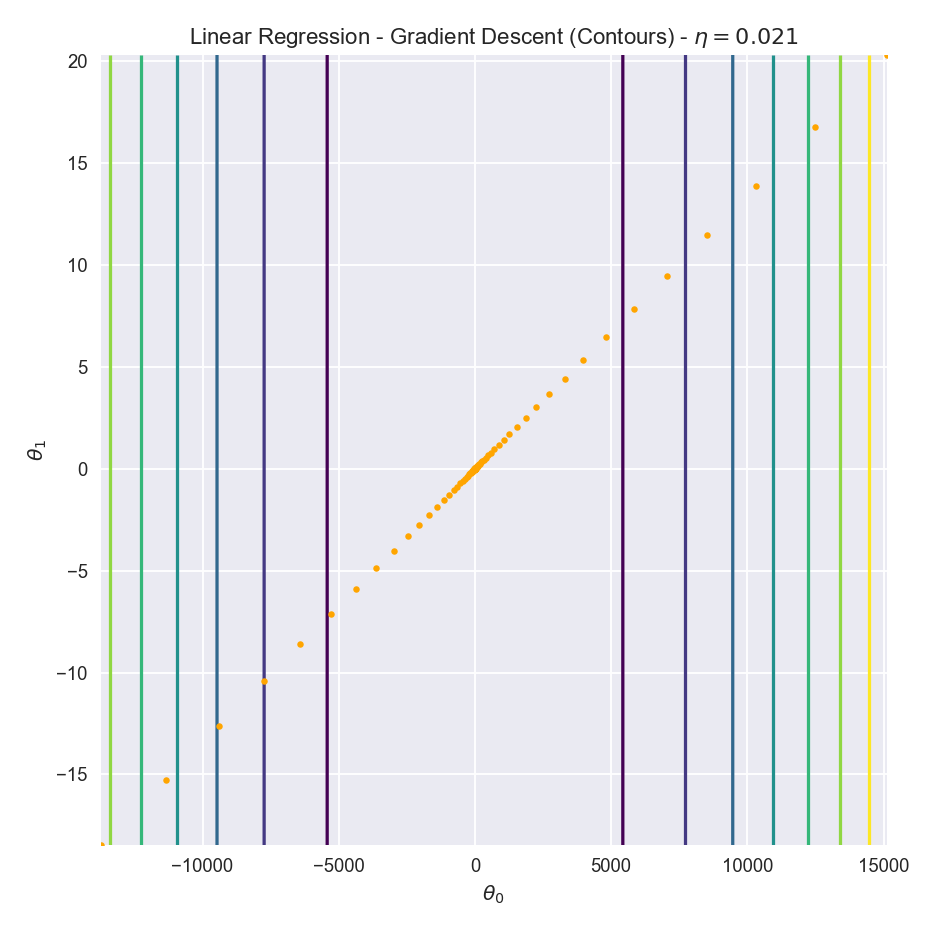

In [12]:
%matplotlib notebook

eta = 0.021
theta_list, cost_list = gradient_descent(x,y,eta,101,0.0001)
contour_plot((-0.4,2),(-1,1),eta,theta_list,cost_list)

Final Cost -  1.8469893983935033e+37
Final Parameters - [6.07780562e+17],[8.17307507e+14]


<IPython.core.display.Javascript object>


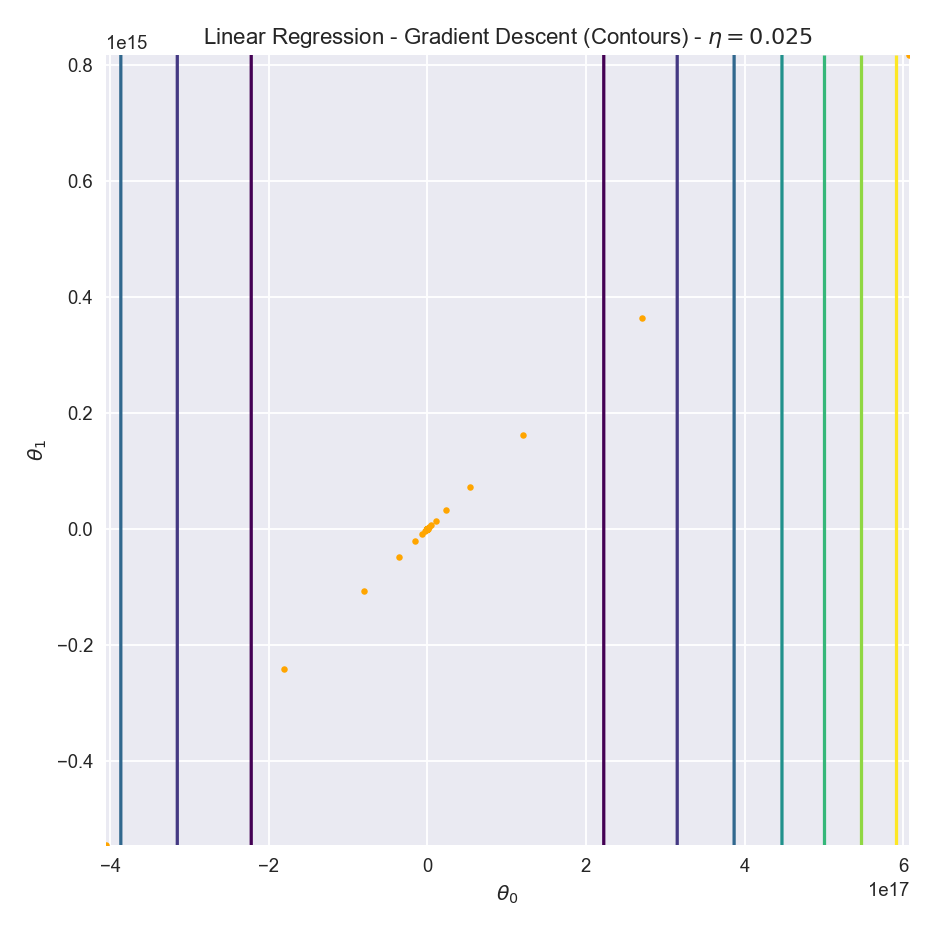

In [13]:
%matplotlib notebook

eta = 0.025
theta_list, cost_list = gradient_descent(x,y,eta,101,0.0001)
contour_plot((-0.4,2),(-1,1),eta,theta_list,cost_list)